In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('d:/jupyter/datasets/Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Get info on columns, check dtypes and na values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
df.shape

(10000, 11)

In [6]:
pd.isnull(df).sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Text(0.5, 1.0, 'Proportions of Customer Churn')

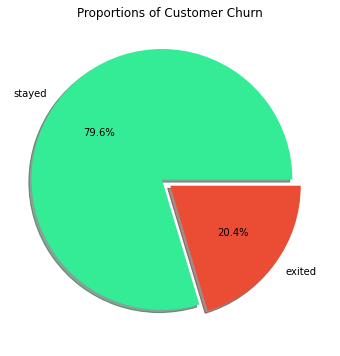

In [7]:
# View the proportion of customer churn


from pylab import rcParams
churnvalue = df['Exited'].value_counts()
stayed = len(df[df['Exited'] == 0])
exited = len(df[df['Exited'] == 1])
# labels = df['Exited'].value_counts().index
rcParams["figure.figsize"] = 6, 6
colors = ['#34eb96', '#eb4c34']
plt.pie(churnvalue, labels=['stayed', 'exited'], colors=colors,
        explode=(0.08, 0), autopct='%1.1f%%', shadow=True)
plt.title('Proportions of Customer Churn')


In [8]:
age_bins = [10, 50, 100]
df['age_range'] = pd.cut(x=df['Age'], bins=age_bins, labels=['Non-SeniorCitizen', 'SeniorCitizen'])
df['age_range'].value_counts()


Non-SeniorCitizen    8739
SeniorCitizen        1261
Name: age_range, dtype: int64

Text(0.5, 1.0, 'Churn by Geography')

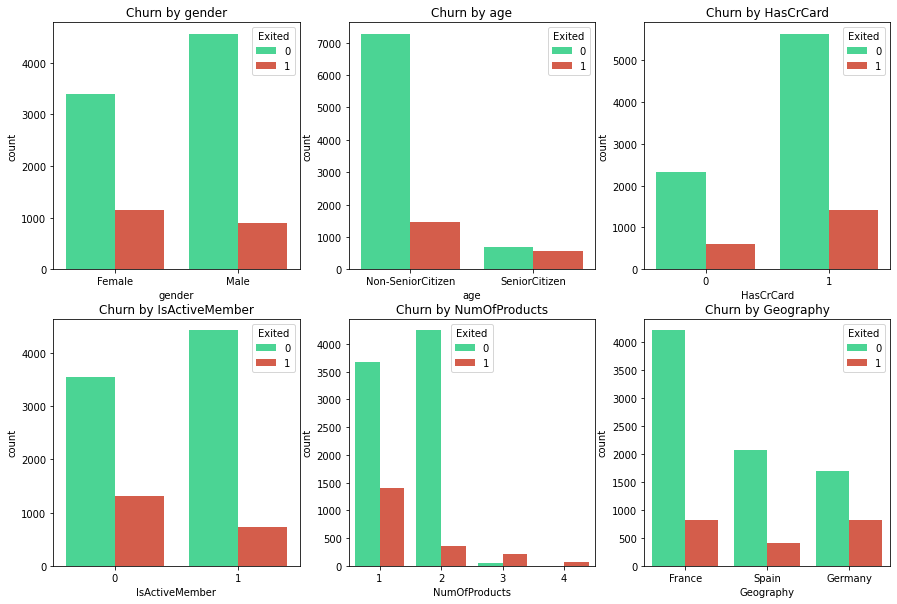

In [9]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

plt.subplot(2, 3, 1)
gender = sns.countplot(x='Gender', hue='Exited', data=df, palette=['#34eb96', '#eb4c34'])
plt.xlabel('gender')
plt.title('Churn by gender')

plt.subplot(2, 3, 2)
seniorcitizen = sns.countplot(
    x='age_range', hue='Exited', data=df, palette=['#34eb96', '#eb4c34'])
plt.xlabel('age')
plt.title('Churn by age')

plt.subplot(2, 3, 3)
hascrcard = sns.countplot(x='HasCrCard', hue='Exited',
                          data=df, palette=['#34eb96', '#eb4c34'])
plt.xlabel('HasCrCard')
plt.title('Churn by HasCrCard')

plt.subplot(2, 3, 4)
isactivemember = sns.countplot(
    x='IsActiveMember', hue='Exited', data=df, palette=['#34eb96', '#eb4c34'])
plt.xlabel('IsActiveMember')
plt.title('Churn by IsActiveMember')

plt.subplot(2, 3, 5)
numofproducts = sns.countplot(
    x='NumOfProducts', hue='Exited', data=df, palette=['#34eb96', '#eb4c34'])
plt.xlabel('NumOfProducts')
plt.title('Churn by NumOfProducts')

plt.subplot(2, 3, 6)
geography = sns.countplot(x='Geography', hue='Exited',
                          data=df, palette=['#34eb96', '#eb4c34'])
plt.xlabel('Geography')
plt.title('Churn by Geography')


In [10]:
for column in df:
    if df[column].dtypes == 'object':
        print(f'{column}: {df[column].unique()}')


Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_range
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Non-SeniorCitizen
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Non-SeniorCitizen
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Non-SeniorCitizen
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Non-SeniorCitizen
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Non-SeniorCitizen


In [12]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

num_scaler = MinMaxScaler()
df[cols_to_scale] = num_scaler.fit_transform(df[cols_to_scale])

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_range
0,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,Non-SeniorCitizen
1,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,Non-SeniorCitizen
2,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,Non-SeniorCitizen
3,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,Non-SeniorCitizen
4,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,Non-SeniorCitizen


In [13]:
df1 = pd.get_dummies(df, columns=(['Geography', 'Gender']))
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_range,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,Non-SeniorCitizen,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,Non-SeniorCitizen,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,Non-SeniorCitizen,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,Non-SeniorCitizen,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,Non-SeniorCitizen,0,0,1,1,0


In [14]:
features = df1.drop(['Exited', 'age_range'], axis='columns')
labels = df1.Exited

In [15]:
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,1,0


In [16]:
labels.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=5)

In [18]:
X_train.shape

(8000, 13)

In [19]:
X_test.shape

(2000, 13)

In [20]:
X_train[:10]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7751,0.800,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1,1,0
4154,0.752,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0,0,1
3881,0.476,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0,1,0
9238,0.846,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0,1,0
5210,0.402,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0,0,1
7487,0.602,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0,1,0
7542,0.314,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1,1,0
7524,0.620,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0,1,0
9412,0.750,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0,0,1
6377,0.684,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0,0,1


In [21]:
len(X_train.columns)


13

In [23]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    # same number of neurons as len(x_train.columns) = 26
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')      # it has 1 and 0
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',   # because our output is binary which is 0 and 1
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)     


Epoch 1/100
250/250 [==============================] - 4s 6ms/step - loss: 0.5276 - accuracy: 0.7656
Epoch 2/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4623 - accuracy: 0.7965
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4515 - accuracy: 0.8008
Epoch 4/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4426 - accuracy: 0.8067
Epoch 5/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4338 - accuracy: 0.8161
Epoch 6/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4263 - accuracy: 0.8164
Epoch 7/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4174 - accuracy: 0.8200
Epoch 8/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4071 - accuracy: 0.8238
Epoch 9/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3917 - accuracy: 0.8328
Epoch 10/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3784 - accura

In [24]:
model.evaluate(X_test, y_test)


63/63 [==============================] - 1s 5ms/step - loss: 0.3615 - accuracy: 0.8505


[0.3614535629749298, 0.8504999876022339]

In [25]:
yp = model.predict(X_test)
yp[:5]


array([[0.04474758],
       [0.07278338],
       [0.07115019],
       [0.10888655],
       [0.09315619]], dtype=float32)

In [26]:
y_test[:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

In [27]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [29]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [32]:
list(y_test[:10])

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.69      0.47      0.56       405

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

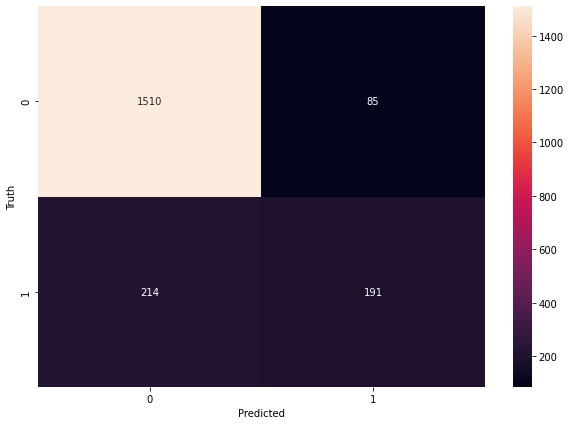

In [34]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [35]:
y_test.shape


(2000,)

accuracy

In [47]:
round((1510+191)/(1510+191+214+85),2)


0.85

Precision for 0 class : customers who did not churn

In [48]:
round(1510/(1510+214),2)

0.88

Precision for 1 class : customers who churn

In [50]:
round(191/(85+191),2)

0.69

recall 0 : 

In [51]:
round(1510/(1510+85),2)

0.95

In [52]:
round(191/(191+214),2)

0.47